In [21]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import time
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

Layers = []
LearnRate = []
Drop = []
Processing_Time = []
Training_Set_Accuracy = []
Test_Set_Accuracy = []
History = []
Predicts = []
Classes = []

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


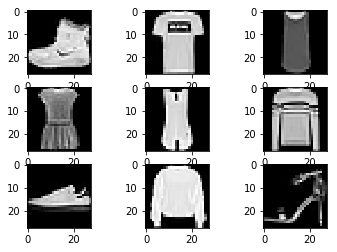

In [3]:
# plot first few images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
max_epochs = 100  
earlystop_callback = \
    tf.keras.callbacks.EarlyStopping(monitor='val_acc',\
    min_delta=0.01, patience=5, verbose=0, mode='auto',\
    baseline=None, restore_best_weights=False)

In [6]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile model
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________




In [8]:
scores, histories = list(), list()
n_folds=5
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(X_train):
    # select rows for train and test
    trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








> 89.217
> 92.525
> 93.158
> 94.808
> 94.950


In [19]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "ankle boot"]
NUM_EPOCHS = 10

In [9]:
 y_preds = model.predict(X_test, verbose=0)

In [11]:
# Load the fashion-mnist pre-shuffled train data and test data
(X, y), (X_t, y_t) = tf.keras.datasets.fashion_mnist.load_data()


In [15]:
for j in range(9):
    print(y_preds[j])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5828801e-33
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9991977e-01 0.0000000e+00 6.0109913e-05 3.0844983e-14 1.8604694e-18
 0.0000000e+00 2.0096988e-05 0.0000000e+00 1.6501854e-32 0.0000000e+00]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 0.0000000e+00 9.6205008e-01 1.9024046e-32 3.7949905e-02
 0.0000000e+00 1.7155652e-20 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 0.0000000e+00 2.6575211e-21 2.9148387e-32 2.2263487e-03
 0.0000000e+00 9.9777359e-01 0.0000000e+00 1.4162131e-31 0.0000000e+00]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
test_preds = np.argmax(y_preds, axis = 1)

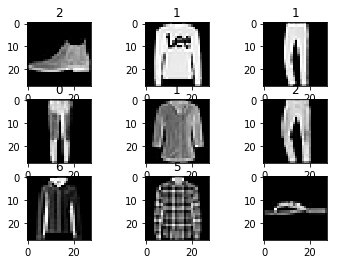

In [17]:
# plot first few images
for i in range(9):
# define subplot
    plt.title(test_preds[i])
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_t[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

[INFO] evaluating network...
             precision    recall  f1-score   support

        top       0.80      0.85      0.82      1000
    trouser       0.99      0.97      0.98      1000
   pullover       0.81      0.76      0.78      1000
      dress       0.90      0.88      0.89      1000
       coat       0.74      0.84      0.78      1000
     sandal       0.99      0.96      0.97      1000
      shirt       0.69      0.64      0.66      1000
    sneaker       0.95      0.95      0.95      1000
        bag       0.98      0.97      0.97      1000
 ankle boot       0.95      0.98      0.96      1000

avg / total       0.88      0.88      0.88     10000



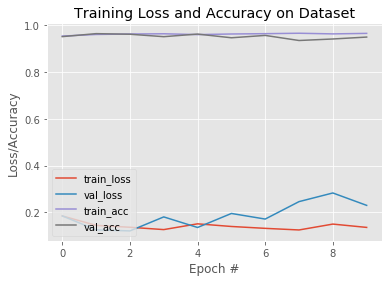

In [22]:
preds = model.predict(X_test)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_split = 0.2,
         callbacks=[earlystop_callback])

Train on 48000 samples, validate on 12000 samples


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [2]:
#Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
 

In [ ]:
#Prep Data
# convert from integers to floats
train_norm = train.astype('float32')
test_norm = test.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
